In [2]:
# Machine learning for each of these countries
# global-- DONE, US, EU--DONE, China, India

In [57]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [58]:
temperature_data = pd.read_csv("clean_data/annual_mean_by_country.csv")
temp_data = pd.DataFrame(temperature_data)
temp_data.head()

,Unnamed: 0,Year,Afghanistan,Africa,Albania,Algeria,American Samoa,Americas,Andorra,Angola,...,Wallis and Futuna Islands,Western Africa,Western Asia,Western Europe,Western Sahara,World,Yemen,Yugoslav SFR,Zambia,Zimbabwe
0,0,1965,0.010000,-0.194667,-0.348833,-0.031917,-0.388500,-0.167583,-0.269250,-0.139833,...,-0.344833,-0.331667,-0.026833,-0.528750,-0.281417,-0.148167,-0.554583,-0.444583,-0.345833,-0.244083
1,1,1966,0.241417,0.150250,0.422583,0.285750,0.115000,-0.139750,0.355833,0.206750,...,0.006667,0.111500,0.744000,0.378167,0.267917,0.159000,0.062000,0.556750,0.290833,0.165333
2,2,1967,-0.362667,-0.228167,-0.076083,-0.093000,-0.360083,-0.056000,0.357333,-0.114667,...,-0.230167,-0.281000,-0.734417,0.476250,-0.079917,-0.113500,-0.235083,0.171500,-0.081917,-0.121333
3,3,1968,-0.339417,-0.166583,0.056417,0.086750,-0.137583,-0.090250,0.198083,-0.160333,...,-0.095333,-0.063667,-0.198083,-0.011083,-0.141417,-0.108750,-0.151167,0.144667,-0.128417,0.089250
4,4,1969,-0.330667,0.348833,-0.043417,0.150083,0.086250,0.278250,-0.363667,0.207500,...,-0.233833,0.540917,0.345000,-0.216750,0.250917,-0.044500,0.183250,-0.288750,0.240583,0.101917


In [59]:
temp = temp_data.drop(columns="Unnamed: 0")
temp.head()

,Year,Afghanistan,Africa,Albania,Algeria,American Samoa,Americas,Andorra,Angola,Anguilla,...,Wallis and Futuna Islands,Western Africa,Western Asia,Western Europe,Western Sahara,World,Yemen,Yugoslav SFR,Zambia,Zimbabwe
0,1965,0.010000,-0.194667,-0.348833,-0.031917,-0.388500,-0.167583,-0.269250,-0.139833,-0.235833,...,-0.344833,-0.331667,-0.026833,-0.528750,-0.281417,-0.148167,-0.554583,-0.444583,-0.345833,-0.244083
1,1966,0.241417,0.150250,0.422583,0.285750,0.115000,-0.139750,0.355833,0.206750,-0.009333,...,0.006667,0.111500,0.744000,0.378167,0.267917,0.159000,0.062000,0.556750,0.290833,0.165333
2,1967,-0.362667,-0.228167,-0.076083,-0.093000,-0.360083,-0.056000,0.357333,-0.114667,-0.294750,...,-0.230167,-0.281000,-0.734417,0.476250,-0.079917,-0.113500,-0.235083,0.171500,-0.081917,-0.121333
3,1968,-0.339417,-0.166583,0.056417,0.086750,-0.137583,-0.090250,0.198083,-0.160333,-0.187500,...,-0.095333,-0.063667,-0.198083,-0.011083,-0.141417,-0.108750,-0.151167,0.144667,-0.128417,0.089250
4,1969,-0.330667,0.348833,-0.043417,0.150083,0.086250,0.278250,-0.363667,0.207500,0.270250,...,-0.233833,0.540917,0.345000,-0.216750,0.250917,-0.044500,0.183250,-0.288750,0.240583,0.101917


In [60]:
# Remove all spaces from column names in df
temp.columns = temp.columns.str.replace(' ','_')

In [72]:
temp_output = temp.to_csv("cleaned_temp.csv")

In [61]:
us_data = temp[['Year', 'United_States_of_America']]
us_data.head()

,Year,United_States_of_America
0,1965,-0.159167
1,1966,-0.325333
2,1967,0.103250
3,1968,-0.231500
4,1969,-0.022583


In [62]:
X = us_data.Year.values.reshape(-1, 1)
y = us_data.United_States_of_America.values.reshape(-1, 1)

# print("Shape: ", X.shape, y.shape)
# X

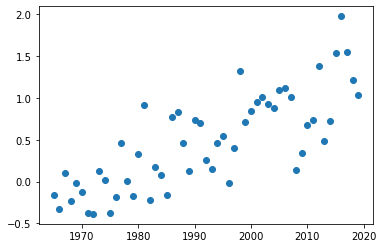

In [63]:
plt.scatter(X, y)

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [65]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [66]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

In [67]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

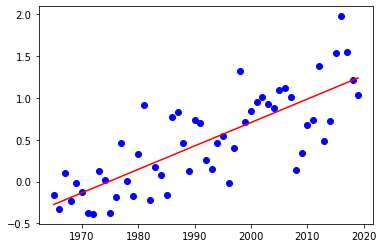

In [68]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [69]:
y_2030 = model.predict([[2030]])
y_2040 = model.predict([[2040]])
y_2050 = model.predict([[2050]])

In [70]:
my_array1 = y_2030
my_array2 = y_2040
my_array3 = y_2050

df1 = pd.DataFrame(my_array1, columns = ['2030'])
df2 = pd.DataFrame(my_array2, columns = ['2040'])
df3 = pd.DataFrame(my_array3, columns = ['2050'])

frames = [df1, df2, df3]
result = pd.concat(frames, axis=1).T
reset = result.reset_index()
# You need to rename the 0 with the same name as the column in the country df
renamed = reset.rename(columns={"index": "Year", 0: "United_States_of_America"})

# renamed.head()
# eu_data.head()

# Create new df
data = [us_data, renamed]
all_data = pd.concat(data, axis=0)
all_data.tail()

,Year,United_States_of_America
53,2018,1.211833
54,2019,1.029750
0,2030,1.545445
1,2040,1.825237
2,2050,2.105029


In [71]:
# Save .csv
eu_output = all_data.to_csv("us_temp.csv")